**1. Introduction**


As the global emphasis on sustainability grows, Electric Vehicles (EVs) have become a focal point in efforts to reduce greenhouse gas emissions and promote cleaner transportation solutions. This analysis specifically targets Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered in Washington State, a region at the forefront of EV adoption.

Through this project, I will explore key trends in EV registration, analyze adoption patterns among different demographics, and examine the various factors influencing the shift towards electric mobility. By leveraging data-driven insights, this analysis aims to provide a comprehensive understanding of the current landscape of EVs in Washington, highlighting the progress made and the challenges that remain in advancing sustainable transportation.

The findings will not only contribute to the discourse on electric mobility but also serve as a valuable resource for policymakers, industry stakeholders, and researchers interested in the dynamics shaping the future of transportation.


**2. importing required libraries**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr, ttest_ind
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px

**3. Loading the Data**

In [ ]:
data = pd.read_csv('/content/dataset.csv')

**4. Initial Exploration**


In [ ]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040.0,2022.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,NaN,198968248.0,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,NaN,5204412.0,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,15.0,218972519.0,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,39.0,186750406.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201.0,2019.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,38.0,2006714.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [ ]:
data.shape

(30957, 17)

In [ ]:
data.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
8852,3FA6P0PU4G,Pierce,South Hill,WA,98374.0,2016.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,25.0,260788342.0,POINT (-122.28449 47.146),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
8853,JTDKARFP7K,Benton,West Richland,WA,99353.0,2019.0,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,8.0,272390583.0,POINT (-119.33788 46.2969),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,5.300501e+10
8854,5YJ3E1EB8N,King,Sammamish,WA,98075.0,2022.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,194183797.0,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
8855,3FMTK3SU7N,King,Kirkland,WA,98033.0,2022.0,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,48.0,205926143.0,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8856,7SAYGAEEXP,Snohomish,Bo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [ ]:
data.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,float64
Model Year,float64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


**5. Data Cleaning**

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,2
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data[data["Model"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
13874,YV4ED3GM2P,King,Seattle,WA,98115,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,221526476,POINT (-122.31765 47.70013),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303300e+10
30517,YV4ED3UL3P,King,Seattle,WA,98115,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,223881556,POINT (-122.31765 47.70013),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [ ]:
data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [ ]:
data[data["Electric Range"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [ ]:
data[data["Base MSRP"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [ ]:
data[data["Legislative District"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,3.200301e+10
12,3C3CFFGE3G,St. Clair,Mascoutah,IL,62258,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,153786167,POINT (-89.79939 38.49028),NaN,1.716350e+10
19,5YJXCAE28G,Saratoga,Greenfield Center,NY,12833,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,218050878,POINT (-73.84643 43.1284),NaN,3.609106e+10
41,5YJSA1E22G,Newport News,Newport News,VA,23602,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,NaN,111593331,POINT (-76.53585 37.10499),NaN,5.170003e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,5YJ3E1EA1M,San Diego,Chula Vista,CA,91913,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,151035818,POINT (-116.97437 32.61628),NaN,6.073013e+09
29767,1N4AZ0CP3F,Kings,Lemoore,CA,93245,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
29834,JTMEB3FV4N,Montgomery,Montgomery,AL,36106,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,195356899,POINT (-86.27374 32.3611),NaN,1.101001e+09
30041,KL8CL6S01E,El Paso,Colorado Springs,CO,80923,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82,0,NaN,172410990,POINT (-104.70202 38.91191),NaN,8.041005e+09


**5.1. Missing Value Percentage:**

A missing value percentage of around 0.05% (as you provided) is quite low. Typically, if less than 5% of your data is missing, it's often acceptable to keep those rows.

In [ ]:
missing_percentage = data.isna().mean() * 100
print(missing_percentage)

VIN (1-10)                                           0.000000
County                                               0.000000
City                                                 0.000000
State                                                0.000000
Postal Code                                          0.000000
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.006461
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.281035
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.019382
Electric Utility                                     0.494234
2020 Cen

In [ ]:
total_missing = data.isna().sum().sum()
total_entries = data.size
total_missing_percentage = (total_missing / total_entries) * 100
print(total_missing_percentage)

0.04731420623293411


In [ ]:
total_non_missing = data.notna().sum().sum()
total_entries = data.size
non_missing_percentage = (total_non_missing / total_entries) * 100
print(f"Percentage of non-missing values: {non_missing_percentage:.2f}%")

Percentage of non-missing values: 99.95%


In [ ]:
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] = data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].fillna(data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].mode()[0])

In [ ]:
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District'].mean())
# Use fillna to replace missing values in 'Legislative District' with the mean of that column.

In [ ]:
data[data["Vehicle Location"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
16,1N4AZ0CP4D,Pierce,Kapowsin,WA,98344,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,2.000000,237061968,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
9196,3FA6P0SU9E,Hidalgo,Mcallen,TX,78501,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,29.939877,119899125,NaN,NaN,4.821502e+10
21728,5YJXCBE22G,Allegheny,Wexford,PA,15090,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,29.939877,177131685,NaN,NaN,4.200341e+10
26788,1N4BZ1CP7K,Pierce,Wilkeson,WA,98396,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,31.000000,476833899,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
29365,1G1FW6S08N,Pacific,Long Beach,WA,98634,2022,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.000000,218102209,NaN,BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...,5.304995e+10
30956,1N4BZ0CPXG,King,Issaquah,WA,98027,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,5.000000,1,NaN,NaN,NaN


In [ ]:
data.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [ ]:
data["Vehicle Location"] = data["Vehicle Location"].fillna(data["Vehicle Location"].mode()[0])
#[0]: Since the mode method can return multiple values (if there are ties), this selects the first mode from the resulting Series.

In [ ]:
# Finding missing value percentage for a specific column
data["Vehicle Location"].isnull().mean()*100

0.0

In [ ]:
data.isnull().mean()*100

,0
VIN (1-10),0.000000
County,0.000000
City,0.000000
State,0.000000
Postal Code,0.000000
Model Year,0.000000
Make,0.000000
Model,0.006461
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [ ]:
data[data["Electric Utility"].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,29.939877,198968248,POINT (-81.80023 24.5545),NaN,1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.939877,5204412,POINT (-114.57245 35.16815),NaN,3.200301e+10
12,3C3CFFGE3G,St. Clair,Mascoutah,IL,62258,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,29.939877,153786167,POINT (-89.79939 38.49028),NaN,1.716350e+10
19,5YJXCAE28G,Saratoga,Greenfield Center,NY,12833,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,29.939877,218050878,POINT (-73.84643 43.1284),NaN,3.609106e+10
21,1G1RD6S55H,Stevens,Nine Mile Falls,WA,99026,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,7.000000,141964049,POINT (-117.54392 47.77676),NaN,5.306595e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30041,KL8CL6S01E,El Paso,Colorado Springs,CO,80923,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82,0,29.939877,172410990,POINT (-104.70202 38.91191),NaN,8.041005e+09
30135,WVWPP7AU0F,Grays Harbor,Westport,WA,98595,2015,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,83,0,19.000000,350229526,POINT (-124.10424 46.89078),NaN,5.302700e+10
30235,JTDKN3DP5C,San Juan,Eastsound,WA,98245,2012,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,40.000000,238814838,POINT (-122.91109 48.69389),NaN,5.305596e+10
30854,3FA6P0PU8E,Portsmouth,Portsmouth,VA,23707,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,29.939877,139855411,POINT (-76.3379 36.83436),NaN,5.174021e+10


In [ ]:
data["Electric Utility"] = data["Electric Utility"].fillna(data["Electric Utility"].mode()[0])

In [ ]:
data["Electric Utility"].isna().mean()*100

0.0

In [ ]:
data.isna().mean()*100

,0
VIN (1-10),0.000000
County,0.000000
City,0.000000
State,0.000000
Postal Code,0.000000
Model Year,0.000000
Make,0.000000
Model,0.006461
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [ ]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,29.939877,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),1.208797e+10
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.939877,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),3.200301e+10
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.000000,218972519,POINT (-120.50721 46.60448),PACIFICORP,5.307700e+10
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.000000,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,5.305795e+10
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.000000,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10


In [ ]:
data.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [ ]:
data["Model"] = data["Model"].fillna(data["Model"].mode()[0])

In [ ]:

data["2020 Census Tract"] = data["2020 Census Tract"].fillna(data["2020 Census Tract"].median())


In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data["DOL Vehicle ID"] = data["DOL Vehicle ID"].fillna(data["DOL Vehicle ID"].median())

In [ ]:
data["Base MSRP"] = data["Base MSRP"].fillna(data["Base MSRP"].median())

In [ ]:
data["Electric Range"] = data["Electric Range"].fillna(data["Electric Range"].median())

In [ ]:
data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30957 entries, 0 to 30956
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         30957 non-null  object 
 1   County                                             30957 non-null  object 
 2   City                                               30957 non-null  object 
 3   State                                              30957 non-null  object 
 4   Postal Code                                        30957 non-null  int64  
 5   Model Year                                         30957 non-null  int64  
 6   Make                                               30957 non-null  object 
 7   Model                                              30957 non-null  object 
 8   Electric Vehicle Type                              30957 non-null  object 
 9   Clean 

In [ ]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,30957.000000,30957.000000,30957.000000,30957.000000,30957.000000,3.095700e+04,3.095700e+04
mean,98155.330103,2019.007365,88.801499,1725.244371,29.939877,1.992143e+08,5.295753e+10
std,2589.413136,2.872896,102.776500,10457.524094,14.601999,9.442641e+07,1.779017e+09
min,6443.000000,1997.000000,0.000000,0.000000,1.000000,1.000000e+00,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,19.000000,1.482759e+08,5.303301e+10
50%,98119.000000,2020.000000,33.000000,0.000000,34.000000,1.922609e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191723e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,184400.000000,49.000000,4.789355e+08,5.603300e+10


In [ ]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

In [ ]:
numerical_data.corr()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.002789,-0.001599,0.005893,-0.051735,0.004259,0.577534
Model Year,-0.002789,1.000000,-0.288052,-0.228502,0.009854,-0.065433,0.001924
Electric Range,-0.001599,-0.288052,1.000000,0.080820,0.025000,-0.000945,-0.004033
Base MSRP,0.005893,-0.228502,0.080820,1.000000,0.007525,0.007718,0.007596
Legislative District,-0.051735,0.009854,0.025000,0.007525,1.000000,-0.002101,-0.001001
DOL Vehicle ID,0.004259,-0.065433,-0.000945,0.007718,-0.002101,1.000000,0.001277
2020 Census Tract,0.577534,0.001924,-0.004033,0.007596,-0.001001,0.001277,1.000000


In [ ]:
Categorical_data = data.select_dtypes(include=['object'])

In [ ]:
Categorical_data.shape

(30957, 10)

In [ ]:
numerical_data.shape

(30957, 7)

**6. Univariate Analysis:**

**6.1 Non-Visual Univariate Analysis**


In [ ]:
numerical_data.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,29.939877,198968248,1.208797e+10
1,89029,2013,38,0,29.939877,5204412,3.200301e+10
2,98901,2011,73,0,15.000000,218972519,5.307700e+10
3,98237,2017,238,0,39.000000,186750406,5.305795e+10
4,98201,2019,26,0,38.000000,2006714,5.306104e+10


In [ ]:
results = {}

for column in numerical_data:
    mean = numerical_data[column].mean()
    median = numerical_data[column].median()
    mode = numerical_data[column].mode()[0] # Get the mode

    results[column] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Display results
print(results, end="\n")


{'Postal Code': {'Mean': 98155.33010304616, 'Median': 98119.0, 'Mode': 98052}, 'Model Year': {'Mean': 2019.0073650547533, 'Median': 2020.0, 'Mode': 2022}, 'Electric Range': {'Mean': 88.80149885324805, 'Median': 33.0, 'Mode': 0}, 'Base MSRP': {'Mean': 1725.2443712246018, 'Median': 0.0, 'Mode': 0}, 'Legislative District': {'Mean': 29.93987690314221, 'Median': 34.0, 'Mode': 45.0}, 'DOL Vehicle ID': {'Mean': 199214295.33330104, 'Median': 192260911.0, 'Mode': 1}, '2020 Census Tract': {'Mean': 52957532764.34177, 'Median': 53033029102.0, 'Mode': 53067011200.0}}


In [ ]:
results = {}

for column in numerical_data:
    varience = numerical_data[column].var()
    std = numerical_data[column].std()

    results[column] = {'varience': varience, 'standard_deviation': std}

# Display results
print(results, end="\n")

{'Postal Code': {'varience': 6705060.38763644, 'standard_deviation': 2589.41313575807}, 'Model Year': {'varience': 8.253531488806596, 'standard_deviation': 2.872896010788869}, 'Electric Range': {'varience': 10563.009019589856, 'standard_deviation': 102.77650032760337}, 'Base MSRP': {'varience': 109359810.16856411, 'standard_deviation': 10457.524093616237}, 'Legislative District': {'varience': 213.21838776110027, 'standard_deviation': 14.601999443949458}, 'DOL Vehicle ID': {'varience': 8916347428931208.0, 'standard_deviation': 94426412.77169862}, '2020 Census Tract': {'varience': 3.1649013610060826e+18, 'standard_deviation': 1779016964.7887235}}


In [ ]:
percentiles = {
    '25th Percentile (Q1)': numerical_data['Electric Range'].quantile(0.25),
    '50th Percentile (Q2 or Median)': numerical_data['Electric Range'].median(),
    '75th Percentile (Q3)': numerical_data['Electric Range'].quantile(0.75)
}

# Display results
print("Percentiles and Quartiles:")
for key, value in percentiles.items():
    print(f"{key}: {value}")

Percentiles and Quartiles:
25th Percentile (Q1): 0.0
50th Percentile (Q2 or Median): 33.0
75th Percentile (Q3): 208.0


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis
# Calculate skewness and kurtosis
results = {}

for column in numerical_data:
    column_data = numerical_data[column]
    skewness_value = skew(column_data)
    kurtosis_value = kurtosis(column_data, fisher=True)  # Fisher's definition: normal = 0

    results[column] = {
        'Skewness': skewness_value,
        'Kurtosis': kurtosis_value
    }

# Display results
print("Skewness and Kurtosis:")
for key, value in results.items():
    print(f"{key}: Skewness = {value['Skewness']}, Kurtosis = {value['Kurtosis']}")


Skewness and Kurtosis:
Postal Code: Skewness = -27.43021955706285, Kurtosis = 795.0876502950532
Model Year: Skewness = -0.8029580844060598, Kurtosis = -0.06092654790479868
Electric Range: Skewness = 0.7959248111450657, Kurtosis = -0.9161205124648943
Base MSRP: Skewness = 6.752614855923939, Kurtosis = 52.985052900559424
Legislative District: Skewness = -0.5531457272130745, Kurtosis = -0.9480767571966311
DOL Vehicle ID: Skewness = 1.1377737016376945, Kurtosis = 2.4362931774178724
2020 Census Tract: Skewness = -23.482261585560803, Kurtosis = 571.9934292477874


In [ ]:
numerical_data.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

**6.2 Visual univariate Analysis:**

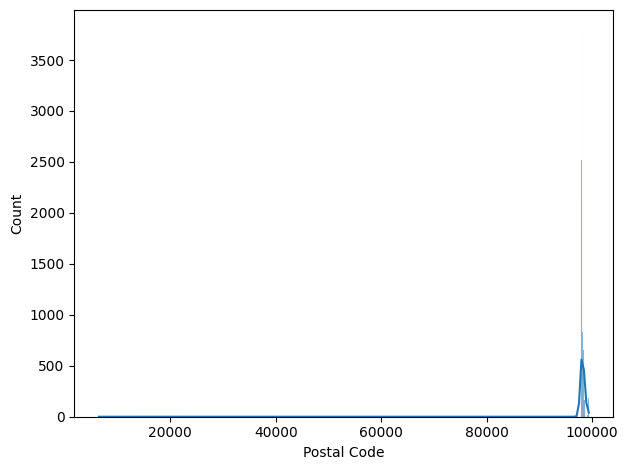

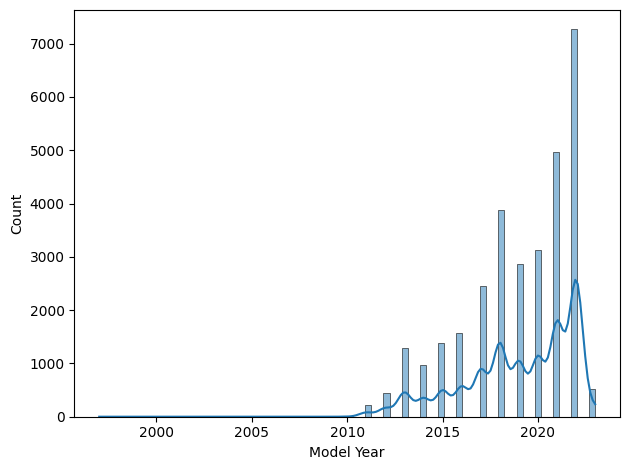

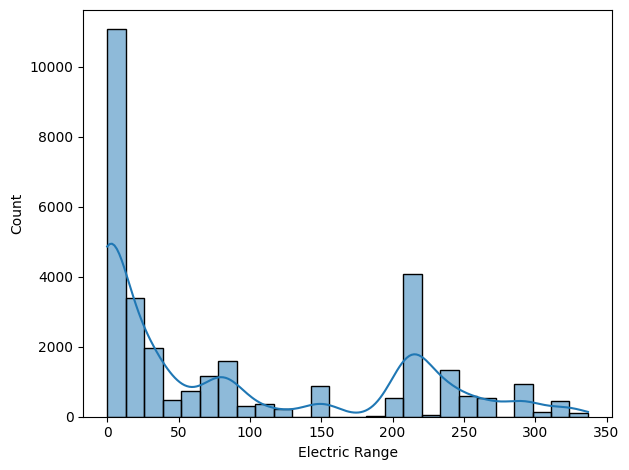

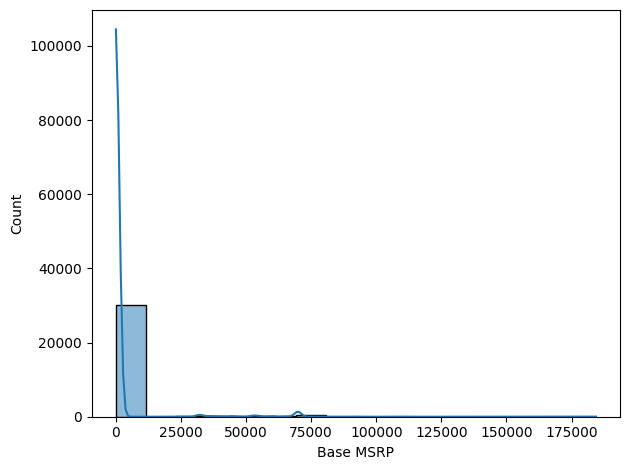

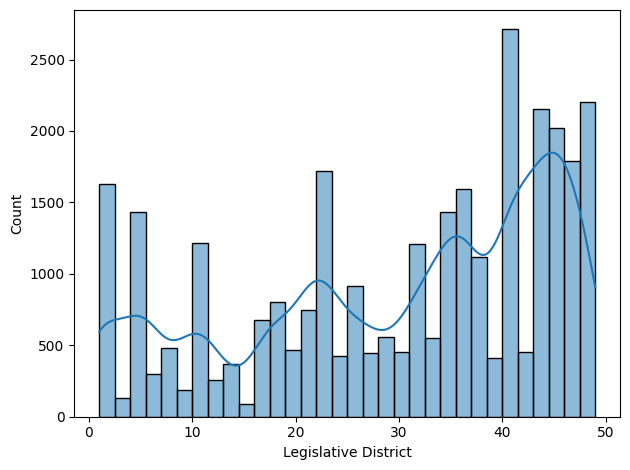

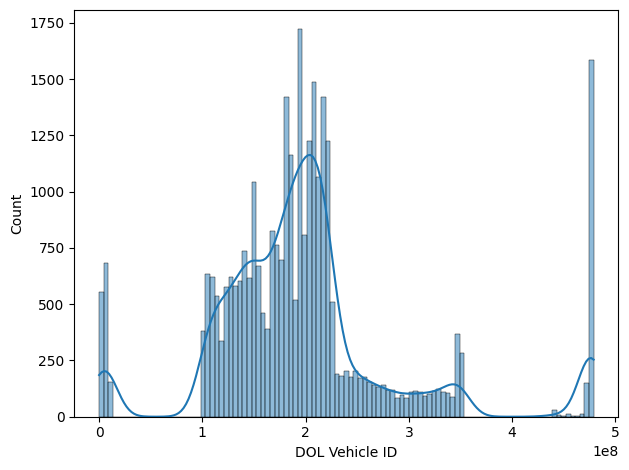

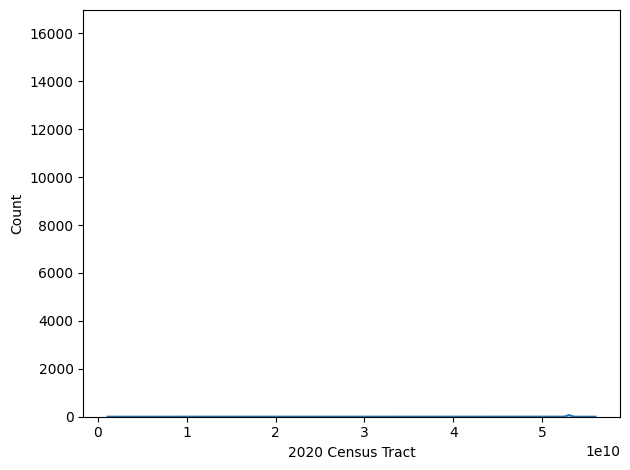

In [ ]:
for i in numerical_data.columns:
  sns.histplot(numerical_data[i], kde=True)
  plt.tight_layout()
  plt.show()

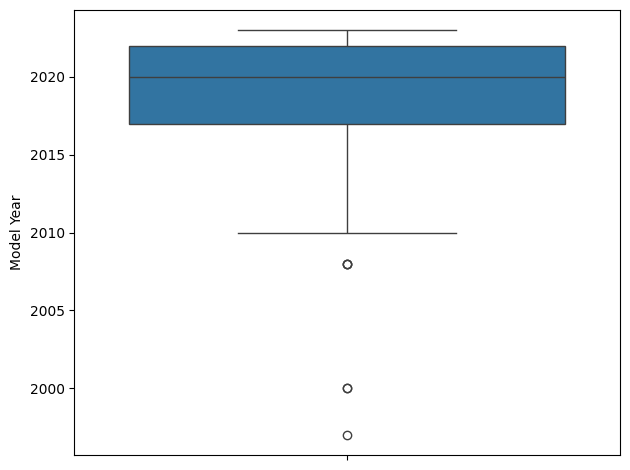

In [ ]:
sns.boxplot(data=numerical_data["Model Year"])
plt.tight_layout()
plt.show()

In [ ]:
numerical_data.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

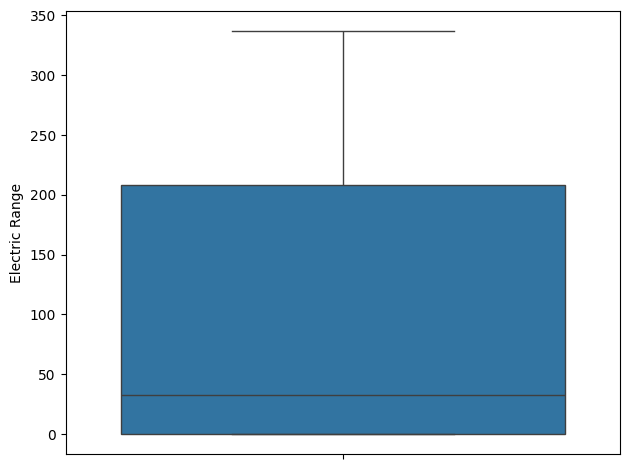

In [ ]:
sns.boxplot(data=numerical_data["Electric Range"])
plt.tight_layout()
plt.show()

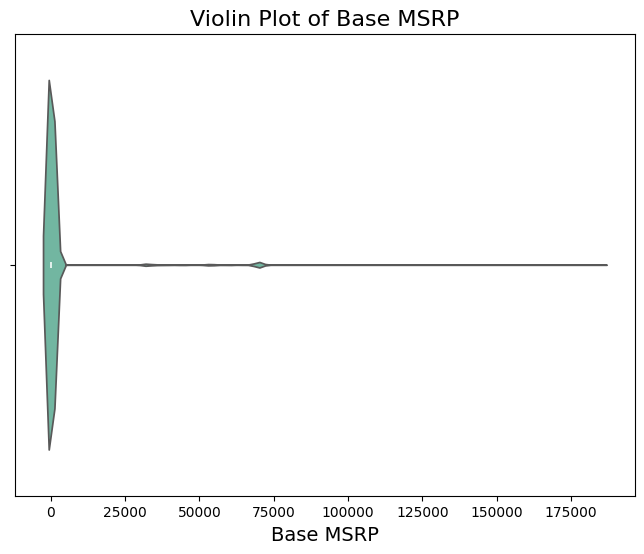

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=numerical_data['Base MSRP'], palette="Set2")
plt.title('Violin Plot of Base MSRP', fontsize=16)
plt.xlabel('Base MSRP', fontsize=14)
plt.show()


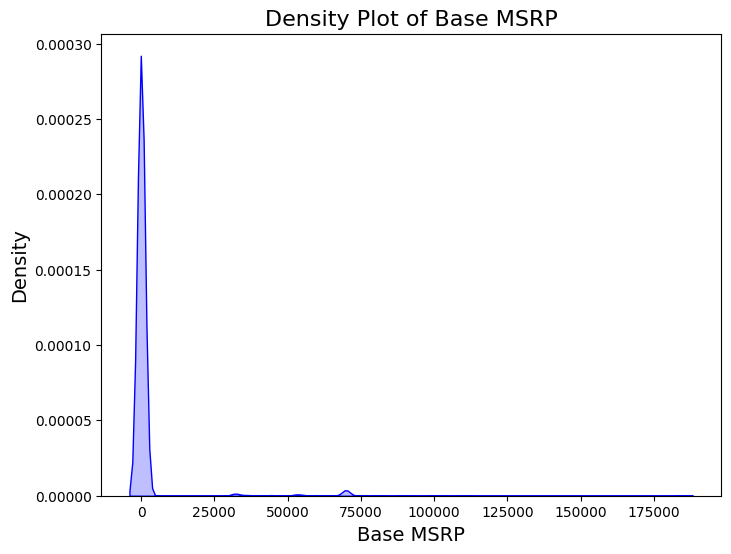

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(numerical_data['Base MSRP'], fill=True, color='blue')
plt.title('Density Plot of Base MSRP', fontsize=16)
plt.xlabel('Base MSRP', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


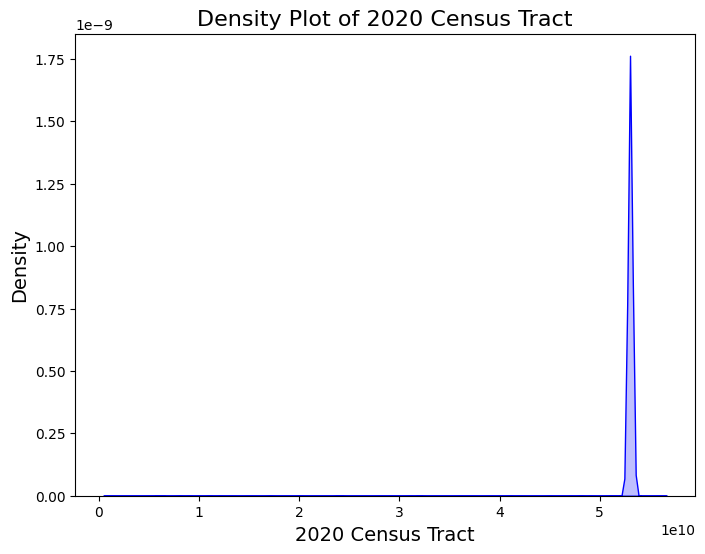

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(numerical_data['2020 Census Tract'], fill=True, color='blue')
plt.title('Density Plot of 2020 Census Tract', fontsize=16)
plt.xlabel('2020 Census Tract', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

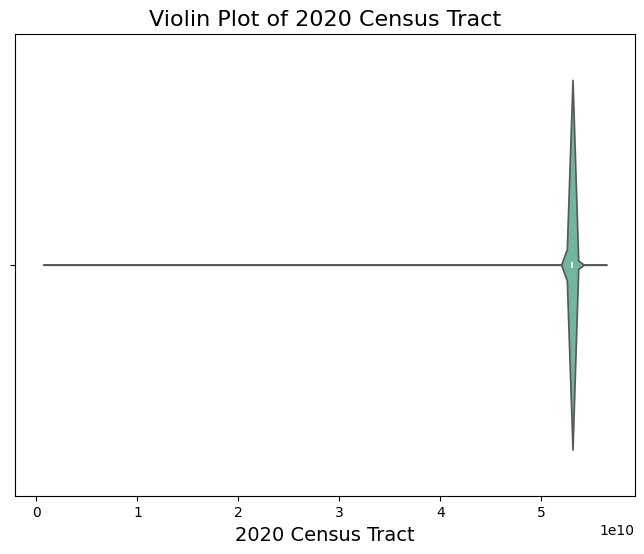

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=numerical_data['2020 Census Tract'], palette="Set2")
plt.title('Violin Plot of 2020 Census Tract', fontsize=16)
plt.xlabel('2020 Census Tract', fontsize=14)
plt.show()

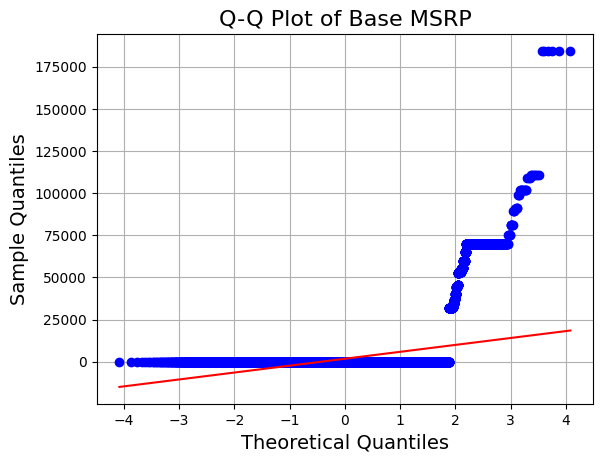

In [ ]:
stats.probplot(numerical_data['Base MSRP'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Base MSRP', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid()
plt.show()

**6.3 Categorical Non-Visual Analysis**

In [ ]:
Categorical_data.shape

(30957, 10)

In [ ]:
Categorical_data.head()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,JTMEB3FV6N,Monroe,Key West,FL,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,1G1RD6E45D,Clark,Laughlin,NV,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,JN1AZ0CP8B,Yakima,Yakima,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.50721 46.60448),PACIFICORP
3,1G1FW6S08H,Skagit,Concrete,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,3FA6P0SU1K,Snohomish,Everett,WA,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


In [ ]:
Categorical_data["State"].value_counts()

,count
State,
WA,30870
CA,22
MD,10
NV,6
VA,5
TX,4
IL,3
OR,3
CO,3


In [ ]:
Categorical_data["State"].unique()

array(['FL', 'NV', 'WA', 'IL', 'NY', 'VA', 'OK', 'KS', 'CA', 'NE', 'MD',
       'CO', 'DC', 'TN', 'SC', 'CT', 'OR', 'TX', 'SD', 'HI', 'GA', 'MS',
       'AR', 'NC', 'MO', 'UT', 'PA', 'DE', 'OH', 'WY', 'AL'], dtype=object)

In [ ]:
Categorical_data["Make"].unique()

array(['TOYOTA', 'CHEVROLET', 'NISSAN', 'FORD', 'TESLA', 'KIA', 'AUDI',
       'FIAT', 'BMW', 'PORSCHE', 'CADILLAC', 'HONDA', 'MITSUBISHI',
       'CHRYSLER', 'RIVIAN', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN',
       'MERCEDES-BENZ', 'JEEP', 'MINI', 'SMART', 'SUBARU', 'POLESTAR',
       'LUCID MOTORS', 'LINCOLN', 'JAGUAR', 'FISKER', 'LAND ROVER',
       'LEXUS', 'TH!NK', 'GENESIS', 'BENTLEY', 'AZURE DYNAMICS'],
      dtype=object)

In [ ]:
Categorical_data["Make"].unique()

array(['TOYOTA', 'CHEVROLET', 'NISSAN', 'FORD', 'TESLA', 'KIA', 'AUDI',
       'FIAT', 'BMW', 'PORSCHE', 'CADILLAC', 'HONDA', 'MITSUBISHI',
       'CHRYSLER', 'RIVIAN', 'HYUNDAI', 'VOLVO', 'VOLKSWAGEN',
       'MERCEDES-BENZ', 'JEEP', 'MINI', 'SMART', 'SUBARU', 'POLESTAR',
       'LUCID MOTORS', 'LINCOLN', 'JAGUAR', 'FISKER', 'LAND ROVER',
       'LEXUS', 'TH!NK', 'GENESIS', 'BENTLEY', 'AZURE DYNAMICS'],
      dtype=object)

In [ ]:
Categorical_data["Make"].value_counts()


,count
Make,
TESLA,14186
NISSAN,3622
CHEVROLET,2882
FORD,1641
BMW,1292
TOYOTA,1197
KIA,1194
AUDI,676
VOLKSWAGEN,668


In [ ]:
Categorical_data["Electric Vehicle Type"].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

In [ ]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
data.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,int64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [ ]:
Categorical_data["Electric Vehicle Type"].value_counts()

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),23738
Plug-in Hybrid Electric Vehicle (PHEV),7219


In [ ]:
Categorical_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [ ]:
Categorical_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Clean Alternative Fuel Vehicle Eligible,16126
Eligibility unknown as battery range has not been researched,10732
Not eligible due to low battery range,4099


**7. Bivariate Analysis**

**7.1 Numerical vs Numerical  Bivariate Non-Visual Analysis**

In [ ]:
numerical_data.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

In [ ]:
electric_range_corr = numerical_data['Electric Range'].corr(numerical_data['Base MSRP'])
print(f'Correlation between Electric Range and Base MSRP: {electric_range_corr:.2f}')

Correlation between Electric Range and Base MSRP: 0.08


In [ ]:
model_year_corr = numerical_data['Model Year'].corr(numerical_data['Base MSRP'])
print(f'Correlation between Model Year and Base MSRP: {model_year_corr:.2f}')

Correlation between Model Year and Base MSRP: -0.23


In [ ]:
# 2. Covariance
# Assuming 'Electric Range' and 'Base MSRP' are numerical features
# Replace 'Categorical_data' with 'numerical_data'
covariance_electric_base = numerical_data['Electric Range'].cov(numerical_data['Base MSRP'])
print(f'Covariance between Electric Range and Base MSRP: {covariance_electric_base:.2f}')

Covariance between Electric Range and Base MSRP: 86864.66


**7.2 Numerical vs Numerical Bivariate Visual Analysis**

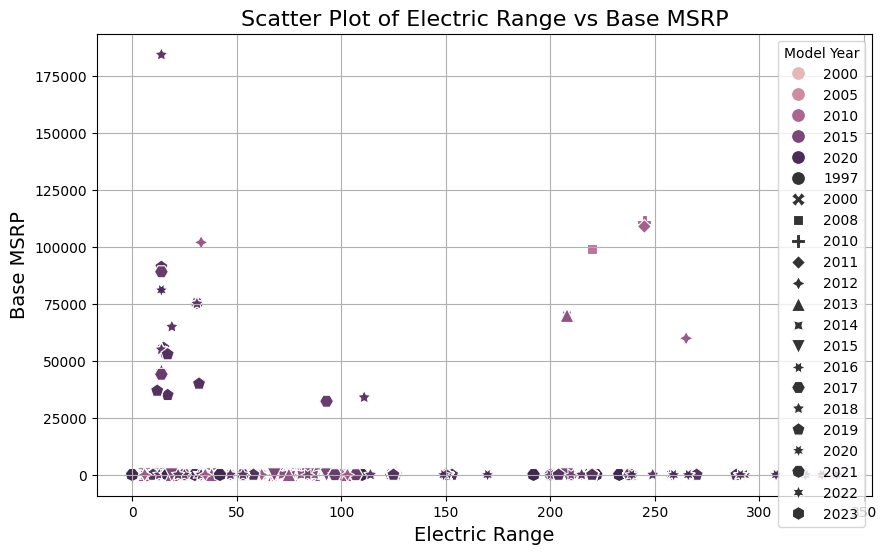

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numerical_data, x='Electric Range', y='Base MSRP', hue='Model Year', style='Model Year', s=100)
plt.title('Scatter Plot of Electric Range vs Base MSRP', fontsize=16)
plt.xlabel('Electric Range', fontsize=14)
plt.ylabel('Base MSRP', fontsize=14)
plt.legend(title='Model Year')
plt.grid()
plt.show()

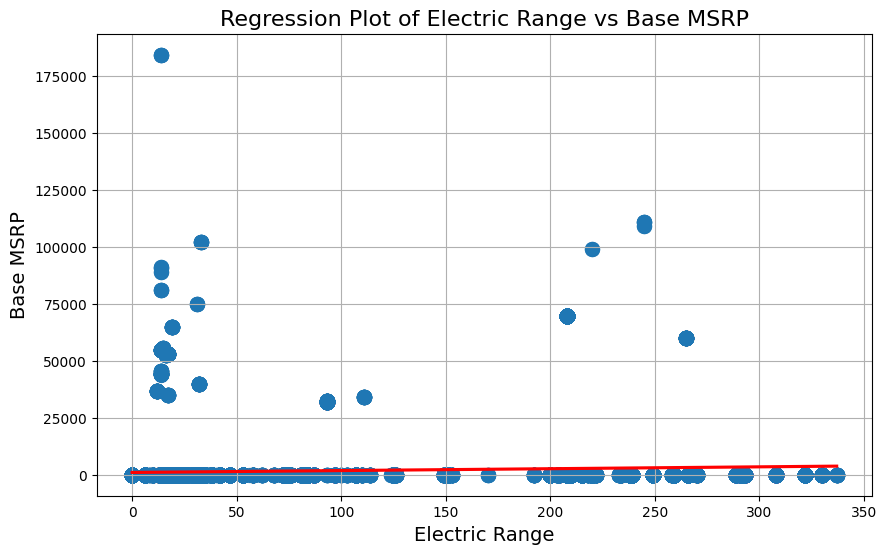

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=numerical_data, x='Electric Range', y='Base MSRP', scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('Regression Plot of Electric Range vs Base MSRP', fontsize=16)
plt.xlabel('Electric Range', fontsize=14)
plt.ylabel('Base MSRP', fontsize=14)
plt.grid()
plt.show()

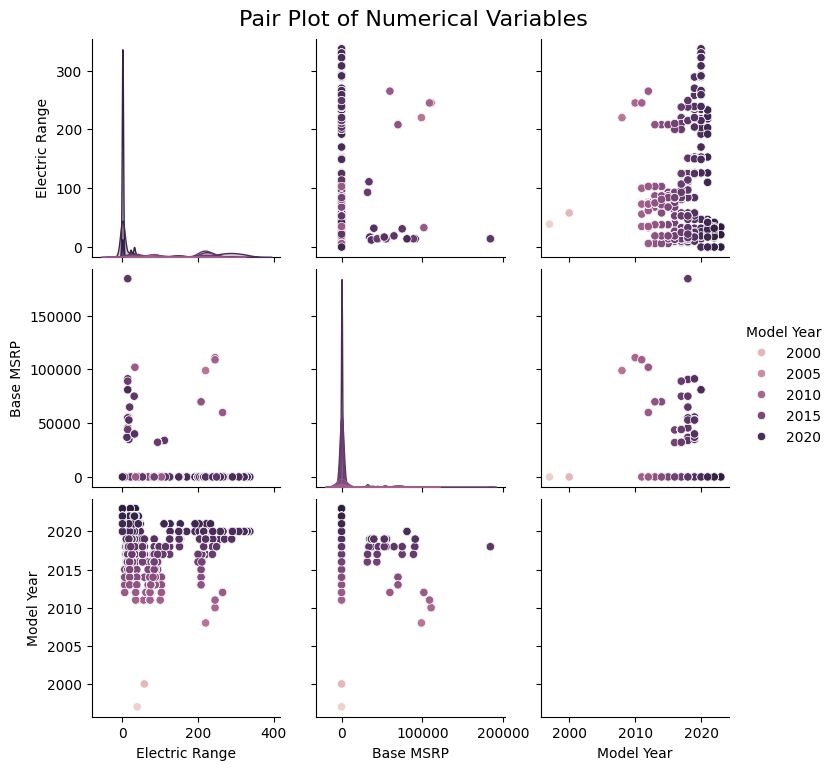

In [ ]:

sns.pairplot(numerical_data, vars=['Electric Range', 'Base MSRP', 'Model Year'], hue='Model Year', height=2.5)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

**7.3 Numerical Vs Categorical Bivariate Non-Visual Analysis**

In [ ]:
# Group by Model Year and calculate mean and median for Electric Range and Base MSRP
grouped_by_year = data.groupby('Model Year')[['Electric Range', 'Base MSRP']].agg(['mean', 'median', 'count'])
print("Grouped by Model Year:\n", grouped_by_year)

# Group by Legislative District and calculate mean and median
grouped_by_district = data.groupby('Legislative District')[['Electric Range', 'Base MSRP']].agg(['mean', 'median', 'count'])
print("\nGrouped by Legislative District:\n", grouped_by_district)

Grouped by Model Year:
            Electric Range                   Base MSRP                
                     mean median count           mean    median count
Model Year                                                           
1997            39.000000   39.0     1       0.000000       0.0     1
2000            58.000000   58.0     2       0.000000       0.0     2
2008           220.000000  220.0     3   98950.000000   98950.0     3
2010           245.000000  245.0     6  110950.000000  110950.0     6
2011            72.537778   73.0   225    1453.333333       0.0   225
2012            63.831486   35.0   451    7480.931264       0.0   451
2013            80.129658   75.0  1288   11613.819876       0.0  1288
2014            81.523859   72.0   964   12834.336100       0.0   964
2015            97.556119   84.0  1381       0.000000       0.0  1381
2016           104.739464   84.0  1566    2129.342273       0.0  1566
2017           113.410736   97.0  2459    1252.193981       0.0  2

In [ ]:
# Descriptive statistics for Electric Range and Base MSRP
desc_stats = data[['Electric Range', 'Base MSRP']].describe()
print("\nDescriptive Statistics:\n", desc_stats)


Descriptive Statistics:
        Electric Range      Base MSRP
count    30957.000000   30957.000000
mean        88.801499    1725.244371
std        102.776500   10457.524094
min          0.000000       0.000000
25%          0.000000       0.000000
50%         33.000000       0.000000
75%        208.000000       0.000000
max        337.000000  184400.000000


In [ ]:
# Run ANOVA
model = ols('Q("Base MSRP") ~ C(Make)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                sum_sq       df          F  PR(>F)
C(Make)   2.126040e+11     33.0  62.792084     0.0
Residual  3.172738e+12  30923.0        NaN     NaN


**7.4 Numerical Vs Categorical Bivariate Visual Analysis**

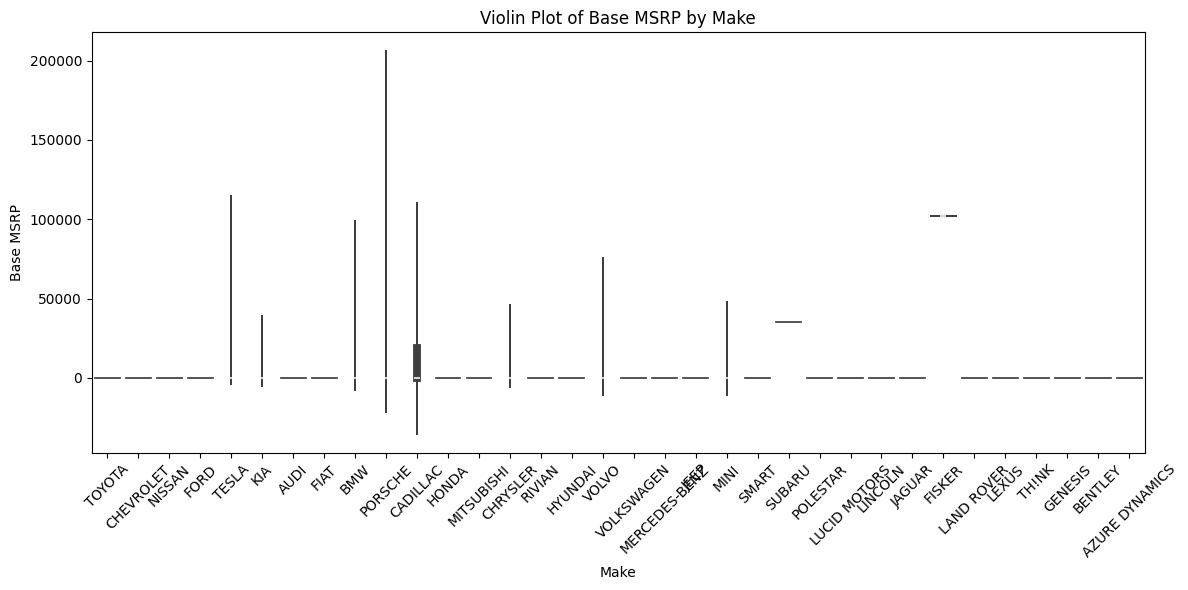

In [ ]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Make', y='Base MSRP', data=data)
plt.title('Violin Plot of Base MSRP by Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

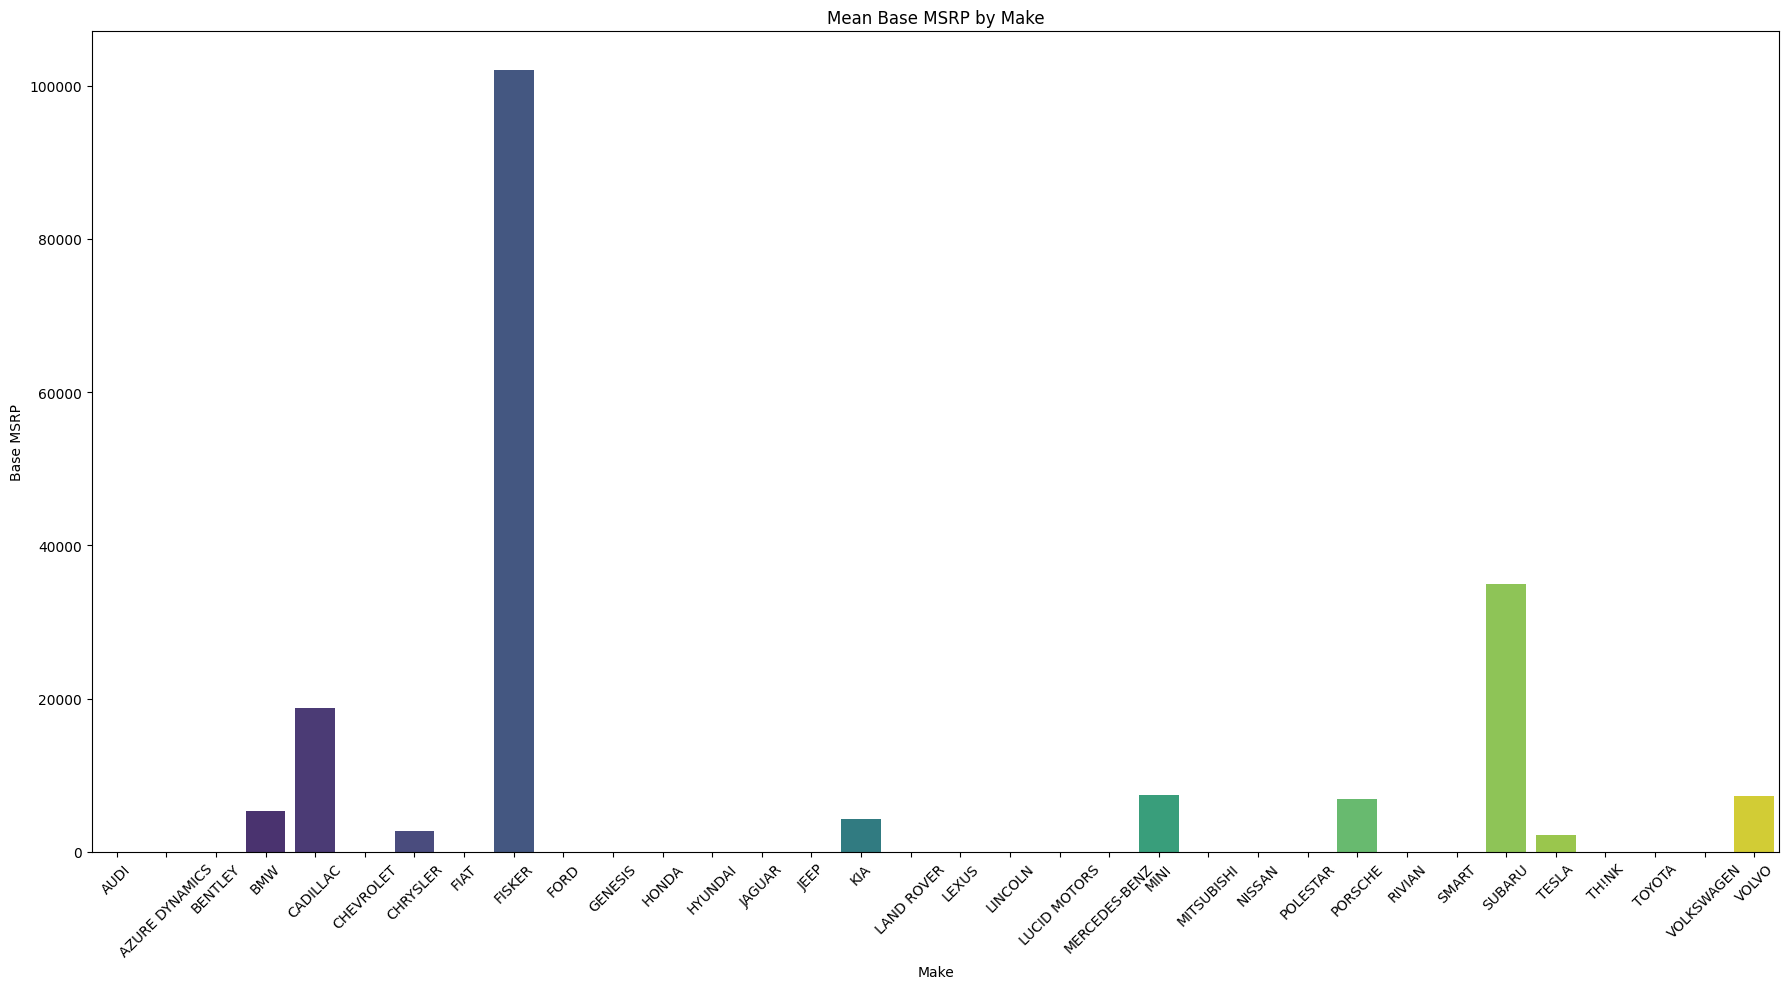

In [ ]:
# Bar Plot (Mean Base MSRP by Make)
plt.figure(figsize=(18, 10))
mean_msrp = data.groupby('Make')['Base MSRP'].mean().reset_index()
sns.barplot(x='Make', y='Base MSRP', data=mean_msrp, palette='viridis')
plt.title('Mean Base MSRP by Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

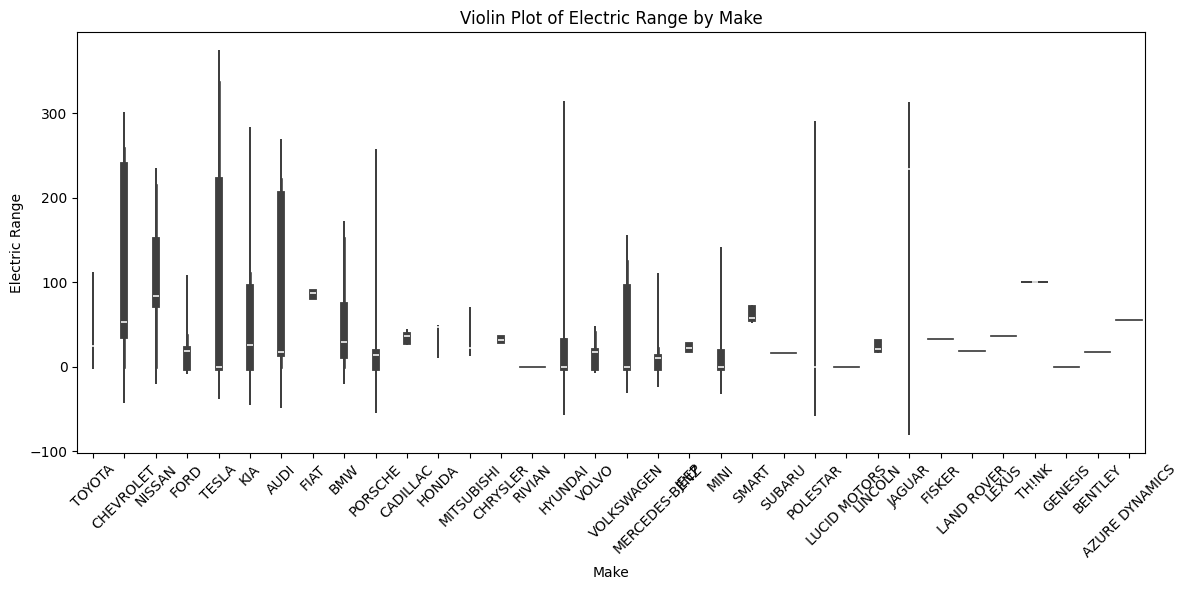

In [ ]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Make', y='Electric Range', data=data)
plt.title('Violin Plot of Electric Range by Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

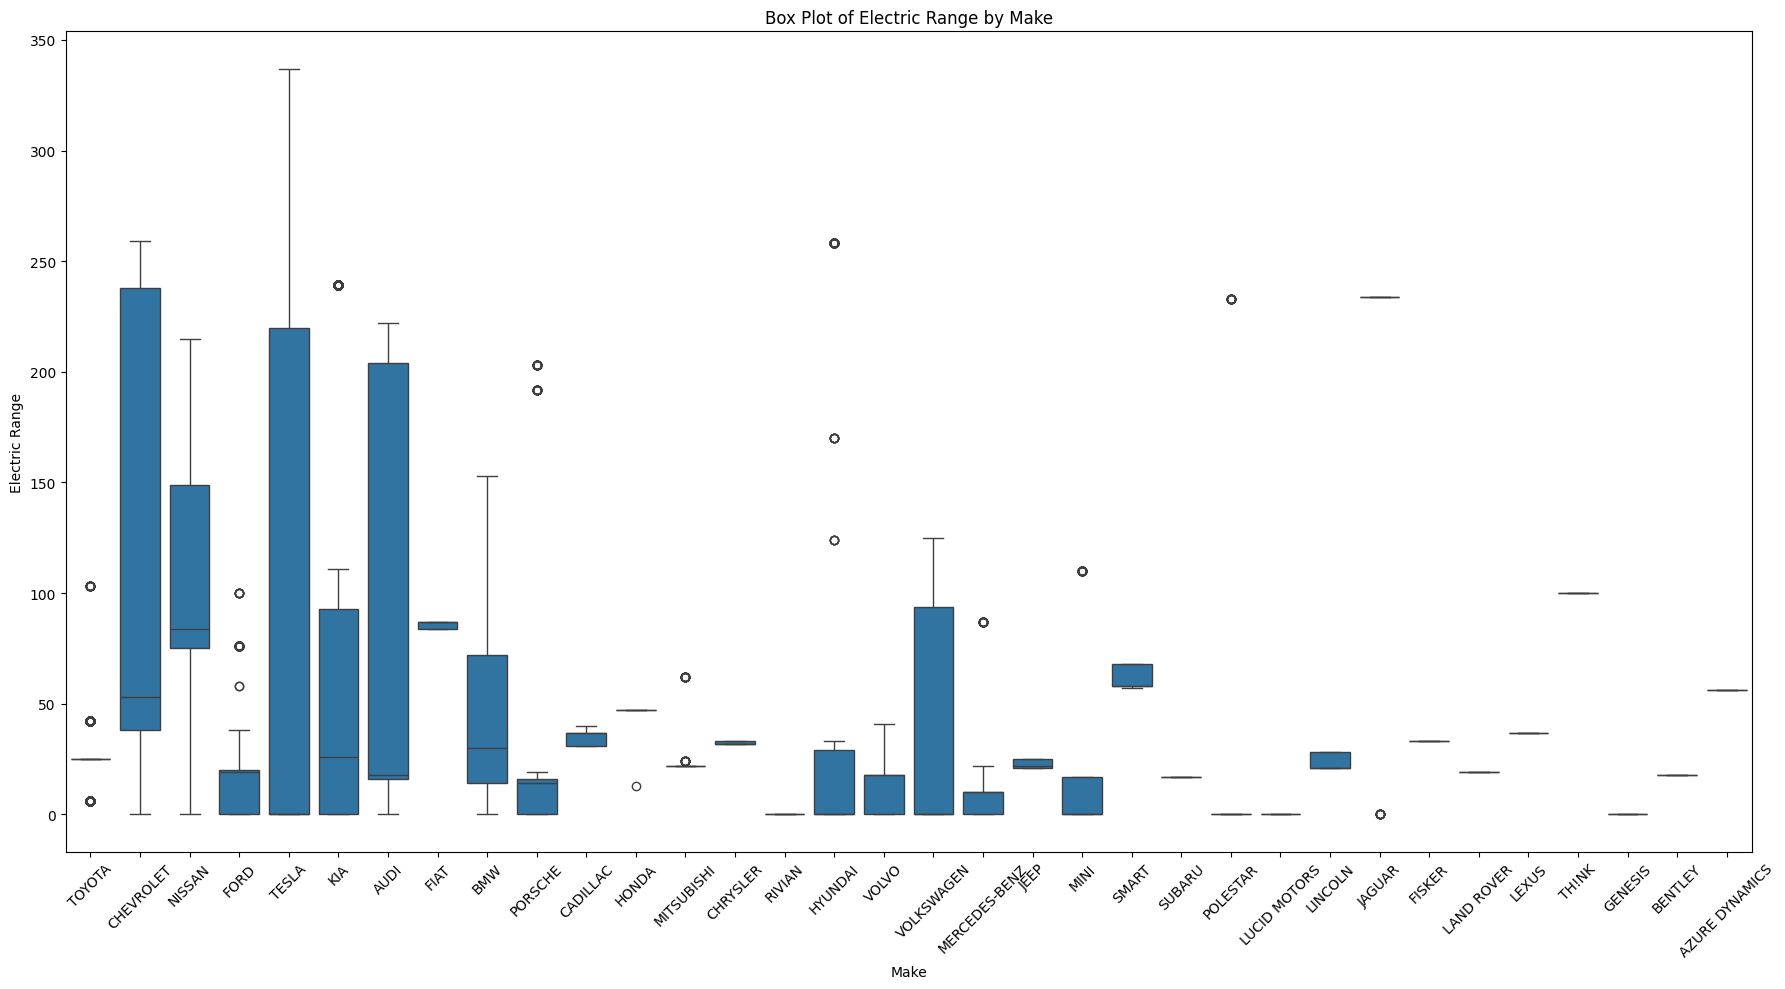

In [ ]:
# Box Plot
plt.figure(figsize=(18, 10))
sns.boxplot(x='Make', y='Electric Range', data=data)
plt.title('Box Plot of Electric Range by Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

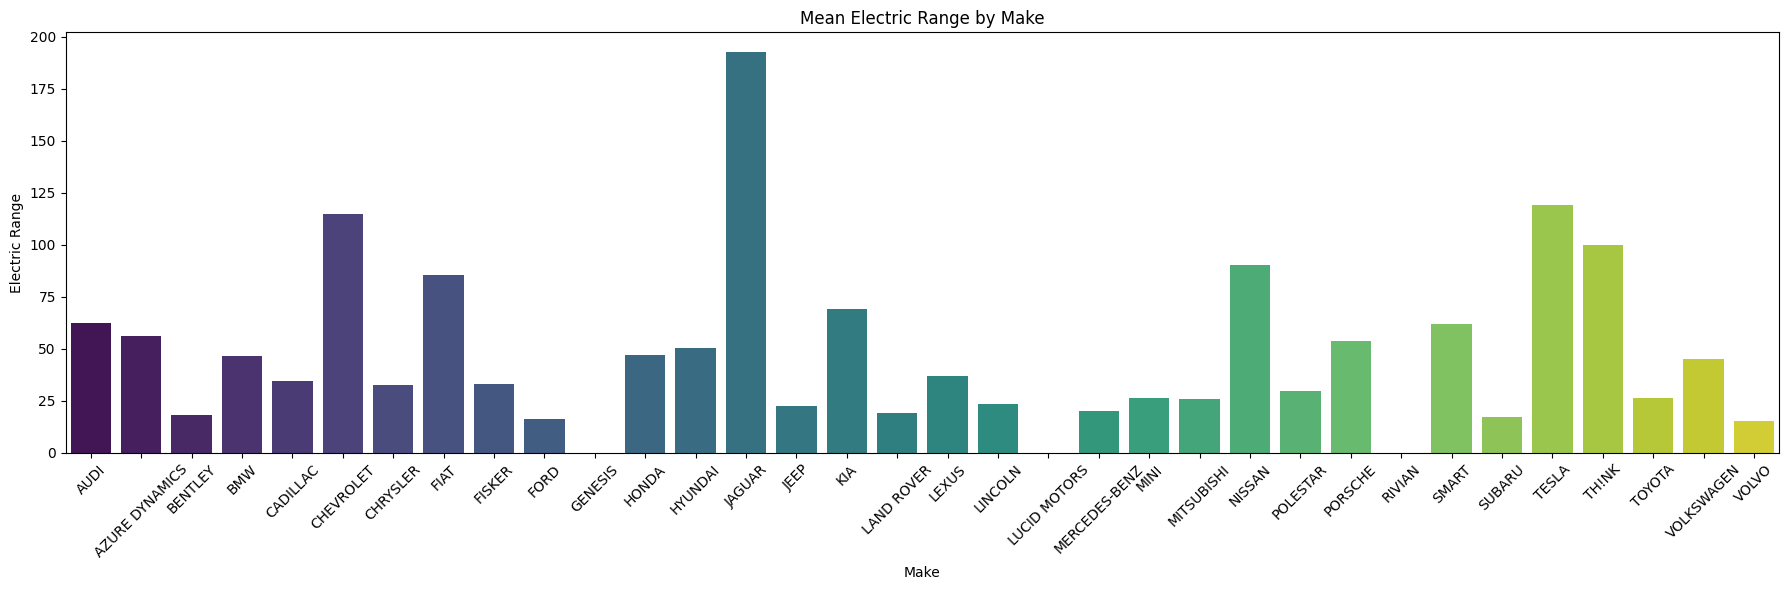

In [ ]:
# Bar Plot (Mean Electric Range by Make)
plt.figure(figsize=(18, 6))
mean_range = data.groupby('Make')['Electric Range'].mean().reset_index()
sns.barplot(x='Make', y='Electric Range', data=mean_range, palette='viridis')
plt.title('Mean Electric Range by Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

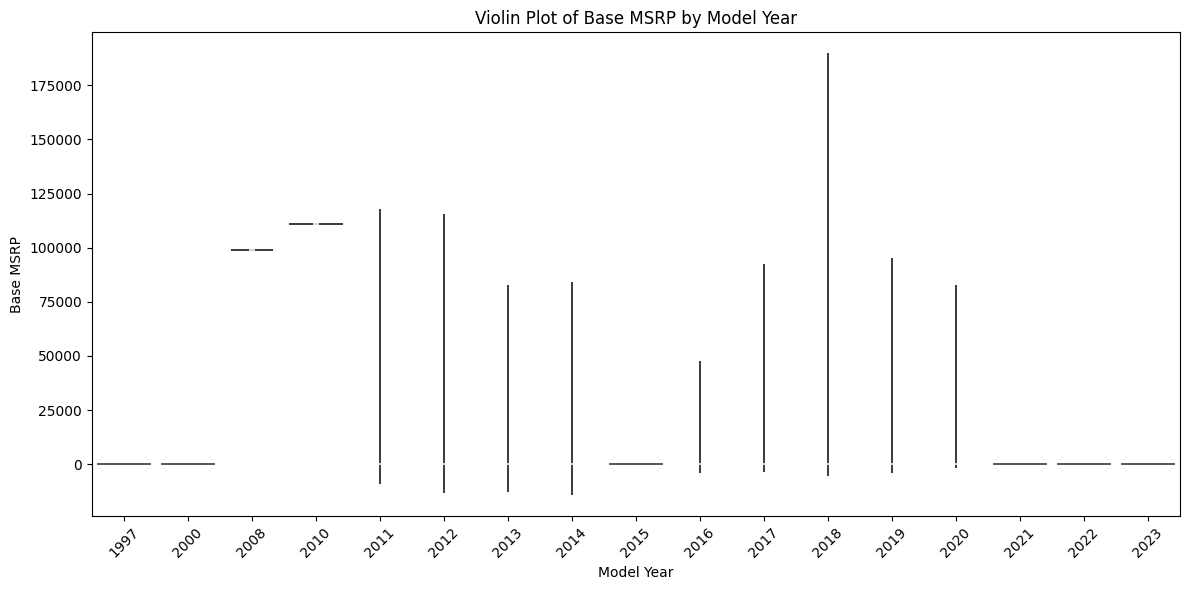

In [ ]:
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Model Year', y='Base MSRP', data=data)
plt.title('Violin Plot of Base MSRP by Model Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

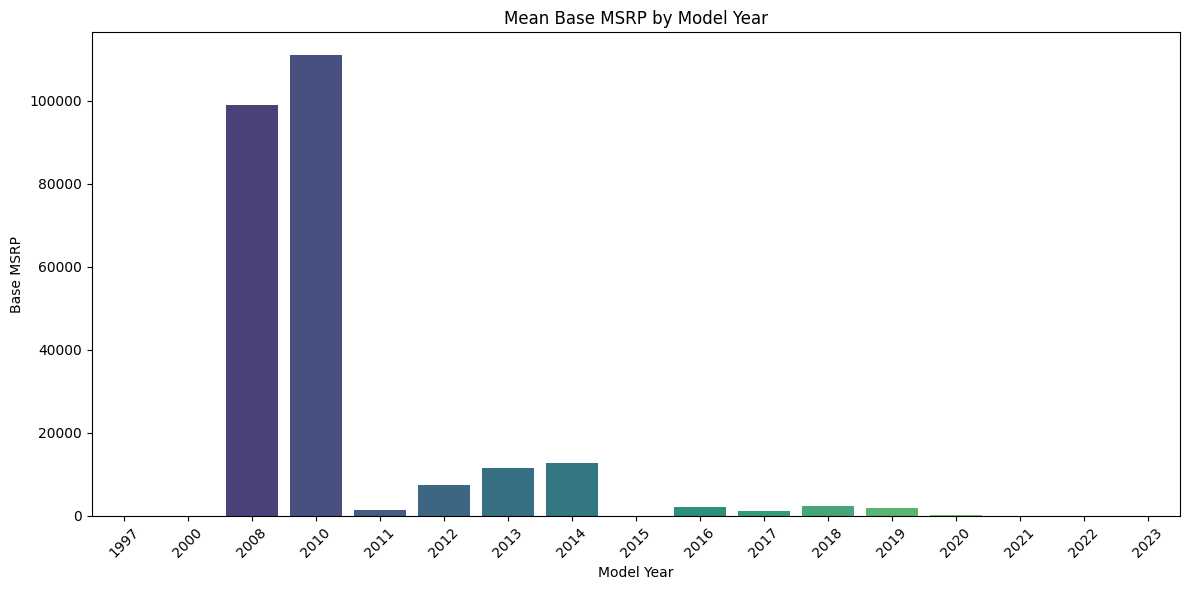

In [ ]:
# Bar Plot (Mean Base MSRP by Model Year)
plt.figure(figsize=(12, 6))
mean_msrp = data.groupby('Model Year')['Base MSRP'].mean().reset_index()
sns.barplot(x='Model Year', y='Base MSRP', data=mean_msrp, palette='viridis')
plt.title('Mean Base MSRP by Model Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7.5 Categorical vs Categorical Non-Visual bivaiate Analysis**

In [ ]:
Categorical_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
# Create a cross-tabulation for Make vs. Electric Vehicle Type
make_ev_type_crosstab = pd.crosstab(data['Make'], data['Electric Vehicle Type'])
print("Make vs. Electric Vehicle Type:")
print(make_ev_type_crosstab)

Make vs. Electric Vehicle Type:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Make                                                    
AUDI                                              332   
AZURE DYNAMICS                                      1   
BENTLEY                                             0   
BMW                                               268   
CADILLAC                                            0   
CHEVROLET                                        1582   
CHRYSLER                                            0   
FIAT                                              227   
FISKER                                              0   
FORD                                              589   
GENESIS                                             3   
HONDA                                               0   
HYUNDAI                                           314   
JAGUAR                                             62   
JEEP                                                0   

In [ ]:
# Create a cross-tabulation for State vs. Clean Alternative Fuel Vehicle Eligibility
state_cafv_crosstab = pd.crosstab(data['State'], data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
print("\nState vs. Clean Alternative Fuel Vehicle (CAFV) Eligibility:")
print(state_cafv_crosstab)


State vs. Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility  Clean Alternative Fuel Vehicle Eligible  \
State                                                                                        
AL                                                                                       1   
AR                                                                                       0   
CA                                                                                      12   
CO                                                                                       2   
CT                                                                                       1   
DC                                                                                       2   
DE                                                                                       0   
FL                                                                                       2  

In [ ]:
# Create a cross-tabulation for County vs. Electric Utility
county_utility_crosstab = pd.crosstab(data['County'], data['Electric Utility'])
print("\nCounty vs. Electric Utility:")
print(county_utility_crosstab)


County vs. Electric Utility:
Electric Utility  AVISTA CORP  \
County                          
Adams                       1   
Allegheny                   0   
Anne Arundel                0   
Asotin                      0   
Benton                      0   
...                       ...   
Walla Walla                 0   
Washington                  0   
Whatcom                     0   
Whitman                    41   
Yakima                      0   

Electric Utility  BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||BIG BEND ELECTRIC COOP, INC  \
County                                                                                        
Adams                                                             9                           
Allegheny                                                         0                           
Anne Arundel                                                      0                           
Asotin                                                           

In [ ]:
# Create a cross-tabulation for City vs. Make
city_make_crosstab = pd.crosstab(data['City'], data['Make'])
print("\nCity vs. Make:")
print(city_make_crosstab)


City vs. Make:
Make            AUDI  AZURE DYNAMICS  BENTLEY  BMW  CADILLAC  CHEVROLET  \
City                                                                      
Aberdeen           0               0        0    0         0          4   
Acme               0               0        0    0         0          0   
Addy               0               0        0    0         0          0   
Airway Heights     0               0        0    0         0          0   
Aldie              0               0        0    0         0          0   
...              ...             ...      ...  ...       ...        ...   
Yacolt             0               0        0    2         0          2   
Yakima             3               0        0    5         1         17   
Yarrow Point       4               0        0    2         0          0   
Yelm               0               0        0    1         0          7   
Zillah             0               0        0    1         0          0   

Make    

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data['Make'], data['Electric Vehicle Type'])
print(contingency_table)

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Make                                                    
AUDI                                              332   
AZURE DYNAMICS                                      1   
BENTLEY                                             0   
BMW                                               268   
CADILLAC                                            0   
CHEVROLET                                        1582   
CHRYSLER                                            0   
FIAT                                              227   
FISKER                                              0   
FORD                                              589   
GENESIS                                             3   
HONDA                                               0   
HYUNDAI                                           314   
JAGUAR                                             62   
JEEP                                                0   
KIA                            

**7.6 Categorical Vs Categorical Visual Bivariate Analysis**

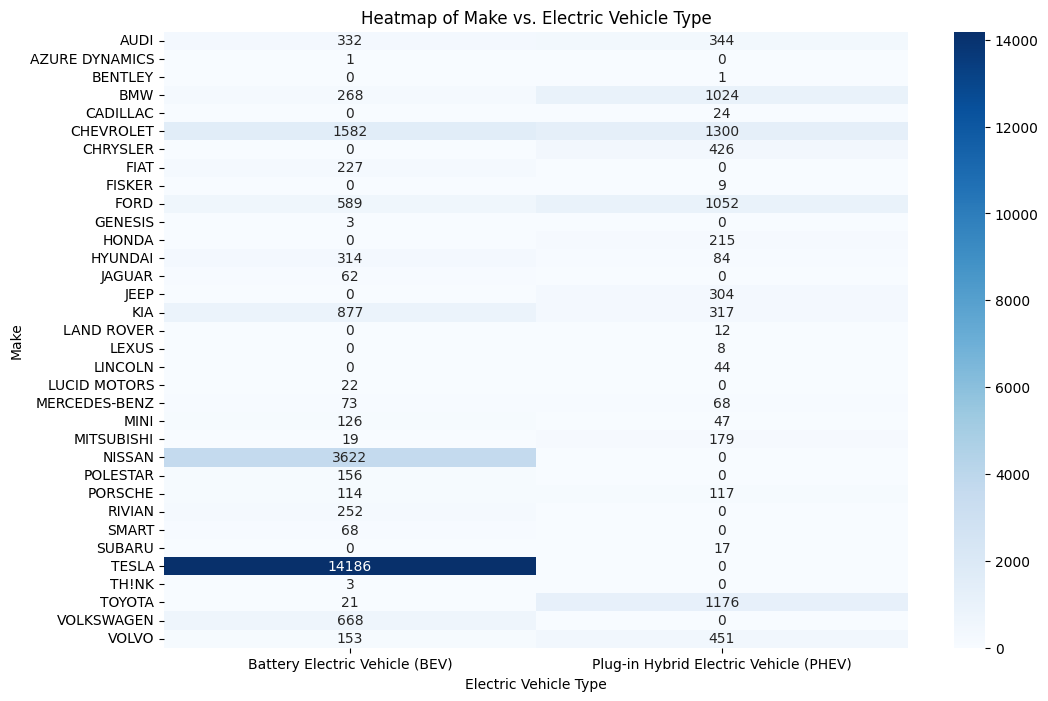

In [ ]:
make_ev_type_crosstab = pd.crosstab(Categorical_data['Make'], Categorical_data['Electric Vehicle Type'])

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(make_ev_type_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Make vs. Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Make')
plt.show()

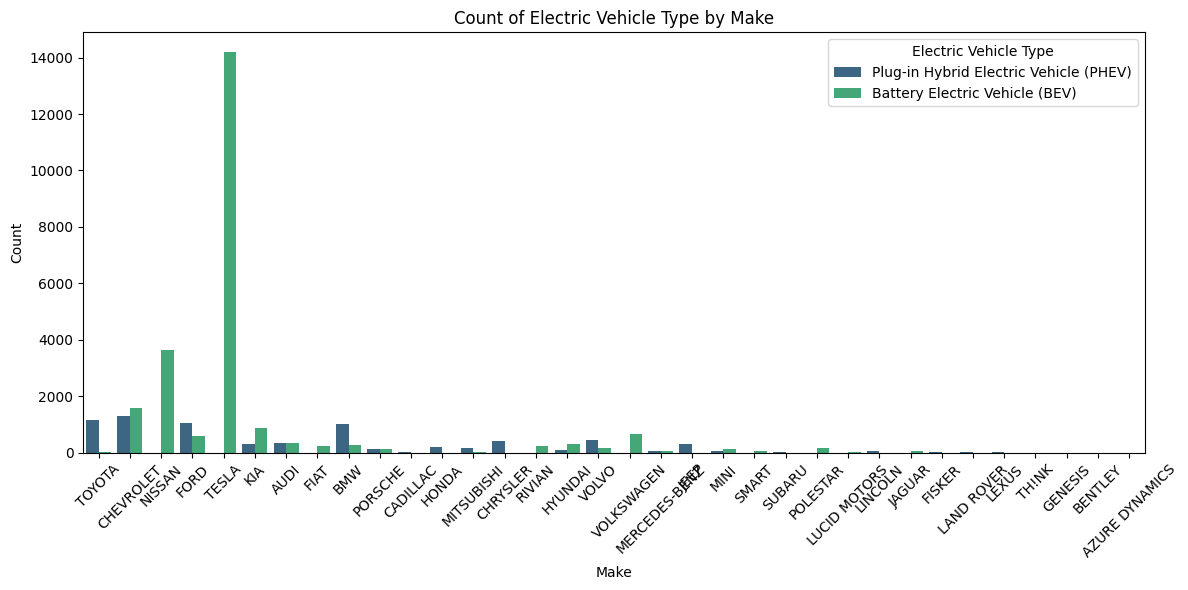

In [ ]:
# Count of Electric Vehicle Type by Make
plt.figure(figsize=(12, 6))
sns.countplot(data=Categorical_data, x='Make', hue='Electric Vehicle Type', palette='viridis')
plt.title('Count of Electric Vehicle Type by Make')
plt.xticks(rotation=45)
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

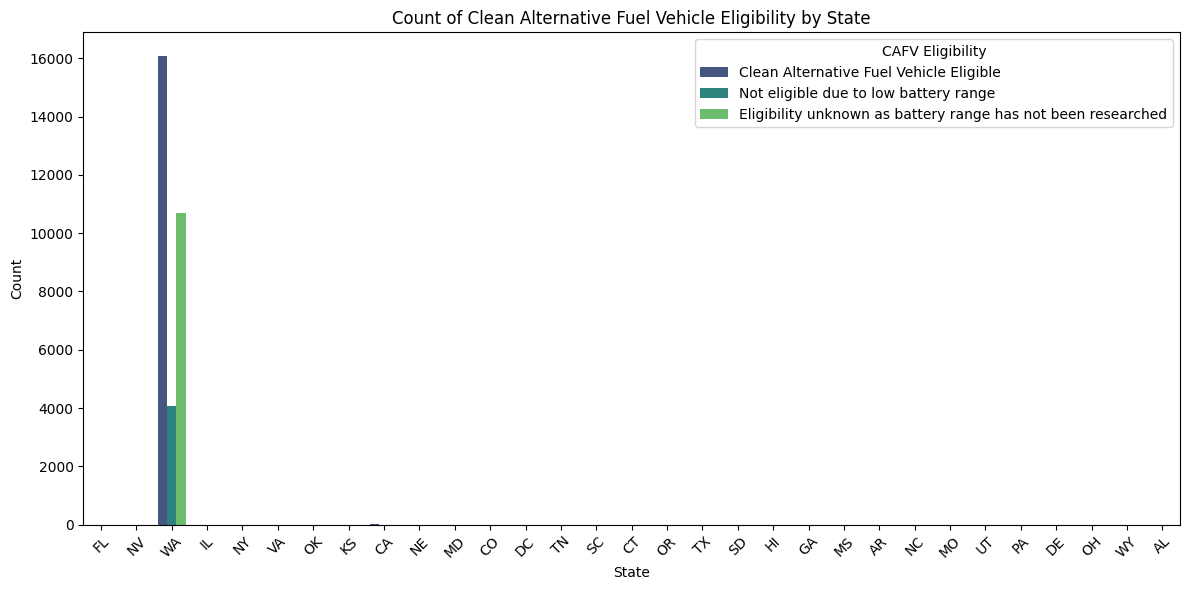

In [ ]:
# Plot a clustered bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='State', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='viridis')
plt.title('Count of Clean Alternative Fuel Vehicle Eligibility by State')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility')
plt.tight_layout()
plt.show()

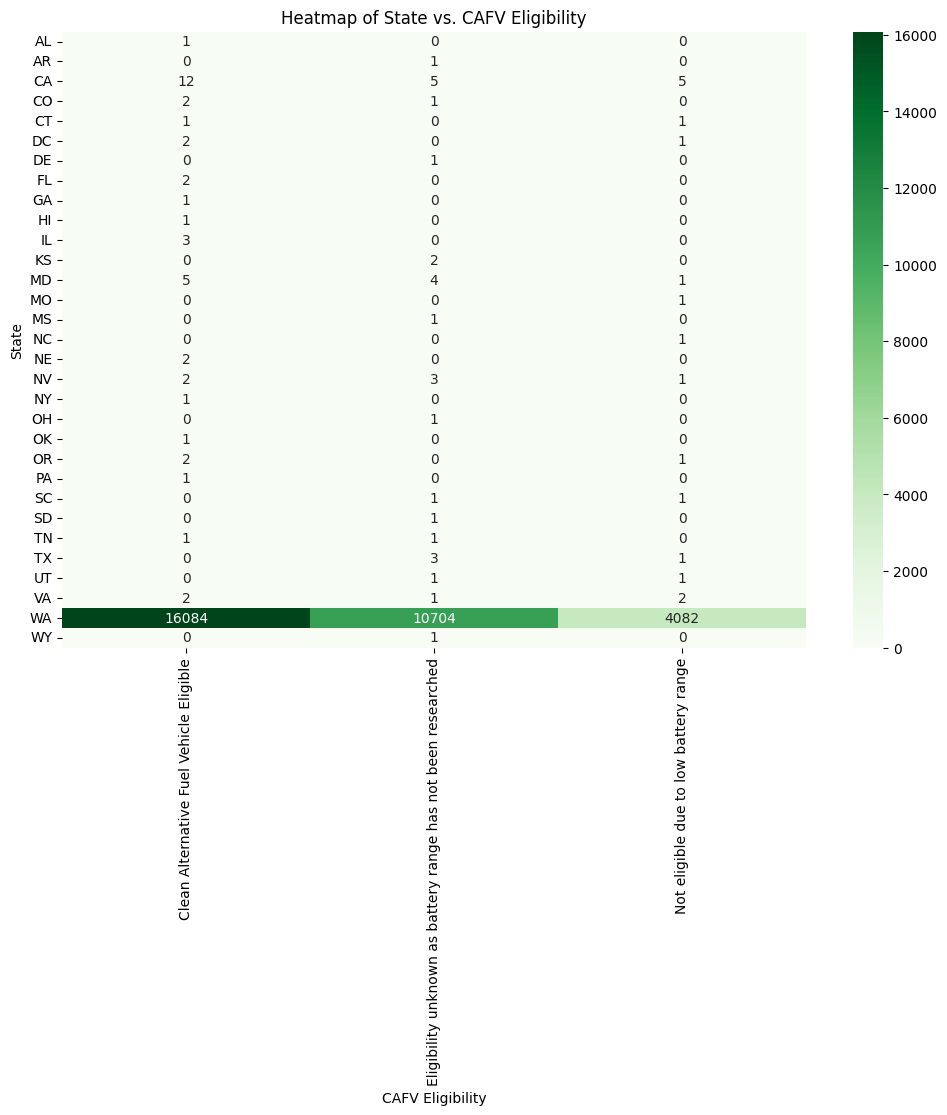

In [ ]:
state_cafv_crosstab = pd.crosstab(data['State'], data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

plt.figure(figsize=(12, 8))
sns.heatmap(state_cafv_crosstab, annot=True, fmt='d', cmap='Greens')
plt.title('Heatmap of State vs. CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('State')
plt.show()

In [ ]:
ev_count_by_county = data['County'].value_counts().reset_index()
ev_count_by_county.columns = ['County', 'EV_Count']

# Create a choropleth map
fig = px.choropleth(
    ev_count_by_county,
    geojson='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-counties.json',  # US counties GeoJSON
    locations='County',
    featureidkey='properties.name',  # Adjust based on your GeoJSON properties
    color='EV_Count',
    color_continuous_scale='Viridis',
    scope="usa",  # Adjust based on your geographical scope
    labels={'EV_Count': 'Number of EVs'},
    title='Number of Electric Vehicles by County'
)

# Show the figure
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

**Univariate & Bivariate Conclussion**


### Univariate Analysis

Univariate analysis involves examining a single variable to summarize and understand its distribution and characteristics. In your electric vehicle dataset, you can perform univariate analysis on various columns, such as:

- **Model Year**: Analyze the distribution of vehicle registrations over different years. You can create histograms or bar charts to show how the number of registered electric vehicles changes annually.
- **Make**: Count the frequency of different manufacturers. A bar chart can illustrate which brands dominate the market.
- **Electric Range**: Assess the range of electric vehicles by plotting a histogram to understand the typical range offered by different models.
- **Base MSRP**: Analyze the price distribution of electric vehicles to determine pricing trends and affordability.

This type of analysis helps identify patterns, trends, and potential outliers within individual variables.

### Bivariate Analysis

Bivariate analysis examines the relationship between two variables to identify correlations or patterns. In your dataset, you can conduct bivariate analysis on pairs of columns, such as:

- **Model Year vs. Make**: Create a grouped bar chart to see how the number of electric vehicles from different manufacturers has changed over the years. This can reveal trends in brand popularity.
- **Electric Range vs. Base MSRP**: Use a scatter plot to explore the relationship between the electric range of vehicles and their prices. This analysis can help identify whether higher-priced vehicles tend to offer longer ranges.
- **State vs. Electric Vehicle Type**: A stacked bar chart can show the distribution of different types of electric vehicles across states, highlighting regional preferences.

Bivariate analysis helps to uncover relationships and dependencies between variables, providing deeper insights into the dynamics of the electric vehicle market.

### Summary

Together, univariate and bivariate analyses provide a comprehensive understanding of your electric vehicle dataset. Univariate analysis focuses on individual variables, while bivariate analysis explores the relationships between them. Both approaches are essential for uncovering insights that can guide decision-making in the transition to sustainable transportation.

**Task 2**

Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [ ]:
state_vehicle_count = data.groupby(['State', 'Model Year']).size().reset_index(name='num_vehicles')

fig = px.choropleth(
    state_vehicle_count,
    locations="State",
    locationmode="USA-states",
    color="num_vehicles",
    hover_name="State",
    animation_frame="Model Year",
    color_continuous_scale="Blues"
)

fig.show()


### Task-2 Conclusion

This code effectively visualizes the distribution and evolution of vehicle registrations across the United States by state and model year. The resulting choropleth map allows viewers to easily identify trends in vehicle counts, highlighting areas of growth and decline over time.

The animation feature provides an engaging way to observe changes year by year, making it clear how different states are contributing to the overall vehicle landscape. This visualization serves as a powerful tool for understanding regional differences in vehicle adoption and can inform stakeholders about potential markets for electric vehicles, policy implications, and infrastructure planning to support sustainable transportation initiatives.

**Task 3**

Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr

In [ ]:
import bar_chart_race as bcr
import warnings
# Replace 'df' with 'data' in the following lines:
data['Model Year'] = data['Model Year'].astype(str)

grouped_data = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

pivoted_data = grouped_data.pivot(index='Model Year', columns='Make', values='Count')

pivoted_data = pivoted_data.fillna(0)

bcr.bar_chart_race(df=pivoted_data, filename='EV_racing_bar_plot.gif',
                   orientation='h', sort='desc', n_bars=10,
                   title='EV Make Count Over the Years', filter_column_colors=True, period_length=1000)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator





###  Task-3 Conclusion

This analysis leveraged a bar chart race to visually represent the trends in Electric Vehicle (EV) registrations by make over the years. By transforming the dataset, we first converted the 'Model Year' into a string format and grouped the data by year and make to count the number of registrations for each vehicle type. The resulting pivot table allowed us to create a dynamic visualization that highlights the evolution of EV adoption across different manufacturers.

The bar chart race effectively showcases the increasing competition among EV manufacturers and the shifting landscape of the market. It reveals how various brands have gained or lost prominence over the years, providing valuable insights into consumer preferences and industry trends. This visual representation not only enhances the understanding of EV adoption patterns but also serves as a tool for stakeholders to assess the growth of electric mobility and make informed decisions moving forward.

Ultimately, this analysis emphasizes the importance of data visualization in comprehending complex datasets, facilitating a clearer interpretation of the transition towards sustainable transportation.



### Conclusion

The analysis of the electric vehicle dataset reveals valuable insights into the dynamics of electric vehicle adoption. Through univariate analysis, we explored individual characteristics such as the distribution of vehicle registrations by model year and make, as well as trends in electric range and pricing. This provided a clear picture of market trends and consumer preferences.

Bivariate analysis further enhanced our understanding by examining relationships between variables, such as the correlation between electric range and base MSRP, and how vehicle types vary across states. These insights can help identify opportunities for growth, inform policy decisions, and guide manufacturers in product development.

### Use Cases

1. **Market Research**: Automakers can use the analysis to identify trends in consumer preferences for specific makes and models, helping them tailor their offerings and marketing strategies.

2. **Policy Development**: Policymakers can leverage insights into electric vehicle adoption patterns by state to craft incentives and infrastructure investments that promote sustainable transportation.

3. **Consumer Insights**: Potential buyers can benefit from understanding which electric vehicles offer the best range and pricing, aiding their decision-making process.

4. **Utility Planning**: Electric utility companies can analyze the distribution of electric vehicles by region to better plan for energy demand and charging infrastructure.

By applying these findings, stakeholders can foster a more informed approach to the growing electric vehicle market, ultimately supporting the transition to sustainable transportation solutions.